<a href="https://colab.research.google.com/github/nitron-alpha-kplr/Machine-Learning/blob/main/k_means_exercice_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Étape 1: Importation des bibliothèques
Étape 2: Chargement des données
Étape 3: Exploration des données
Étape 4: Prétraitement des données (normaliser les fonctionnalités à l'aide d'une transformation de mise à l'échelle standard)
Étape 5: Application du modèle K-means
Étape 6: Évaluation des résultats
Étape 7: Visualisation des clusters
Etape 8 : Vérification du nombre K de clusters (retrouver k=3)

Étape 1: Importation des bibliothèques Étape

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

Étape 2: Chargement des données

In [3]:
data = load_iris()
X = data.data
y = data.target

Étape 3: Exploration des données

In [4]:
#Pour faciliter la manipulation des données, nous allons créer un DataFrame à l'aide de Pandas. Les caractéristiques (features) sont stockées dans la variable X et les étiquettes (labels) dans la variable y. Exécutez la cellule ci-dessous pour créer le DataFrame :

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y


In [5]:
#Examinons les premières lignes du DataFrame pour avoir un aperçu des données. Exécutez la cellule ci-dessous pour afficher les premières lignes :


df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


 Étape 4: Prétraitement des données (normaliser les fonctionnalités à l'aide d'une transformation de mise à l'échelle standard)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(X))

print(scaler.mean_)
newX= scaler.transform(X)
print(newX)







StandardScaler()
[5.5 2. ]
[[-1.          0.        ]
 [-1.          1.22474487]
 [-1.         -1.22474487]
 [ 1.          0.        ]
 [ 1.          1.22474487]
 [ 1.         -1.22474487]]


Étape 5: Application du modèle K-means

In [13]:

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(newX)
kmeans.labels_

ypred = kmeans.predict(newX)
kmeans.score(newX)



-7.333333333333334

Étape 6: Évaluation des résultats

7: Visualisation des clusters 

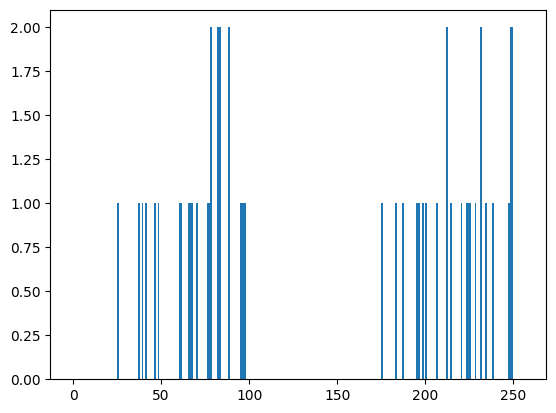

Etape 8 : Vérification du nombre K de clusters (retrouver k=3)

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

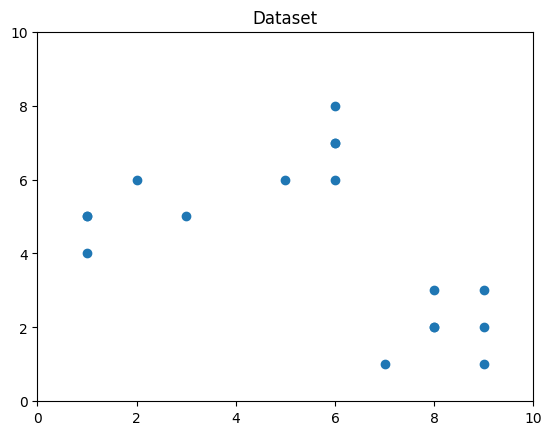

In [20]:
# Creating the data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
  
# Visualizing the data
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

In [21]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [22]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 3.4577032384495707
2 : 1.7687413573405673
3 : 0.8819889697423957
4 : 0.7587138847606585
5 : 0.6635212812400347
6 : 0.6178235133263348
7 : 0.5093717077076823
8 : 0.43613020955135845
9 : 0.35294117647058826


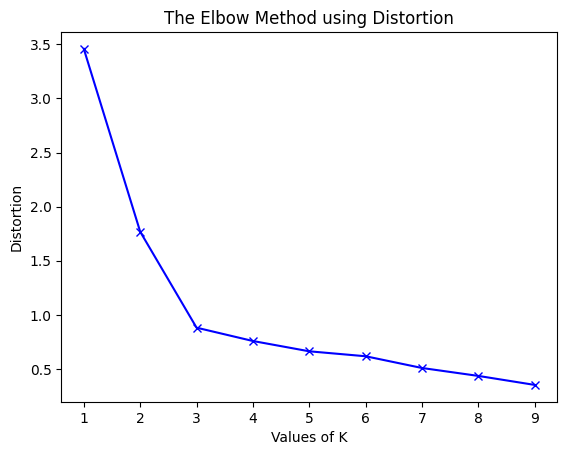

In [23]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()